## Importing libraries 

In [44]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
import time 

sns.set_style('darkgrid')


## Load datasest 

In [2]:
df = pd.read_csv('~/Desktop/Heart-disease-classification/data/heart_failure_clinical_records_dataset.csv')

## Data Exploration & Visualization 

In [3]:
#checking the shape of the dataset 
df.shape

(299, 13)

In [4]:
#checking five rows of the data 
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
#checking columns type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
#checking for missing values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
#checking for duplicates 
df.duplicated().sum()

0

In [8]:
#checking summary statistics on continuous columns

#select continuous columns 
cont_columns = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
cat_columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking']

df_cont_columns = df[cont_columns]


df_cont_columns.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [9]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

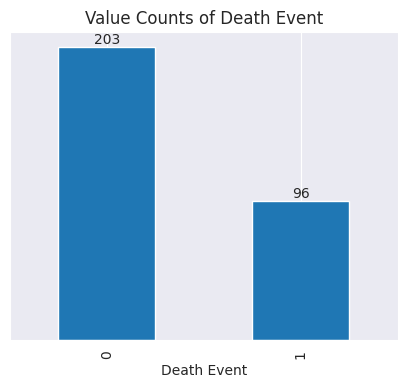

In [10]:
# Death events value counts 
# Calculate value counts of death event 
value_counts_death_event = df['DEATH_EVENT'].value_counts()

# Plot the bar chart
plt.figure(figsize=(5, 4))
ax = value_counts_death_event.plot(kind='bar')

# Annotate each bar with the count
for i, count in enumerate(value_counts_death_event):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

ax.yaxis.set_visible(False)  # Hide the y-axis


# Set labels and title
plt.xlabel('Death Event')
plt.ylabel('Counts')
plt.title('Value Counts of Death Event')

# Display the plot
plt.show()

In [11]:
def hist_plot(col):
    
    # Grouping ages based on death events
    alive_ages = df[df['DEATH_EVENT'] == 0][col]
    dead_ages = df[df['DEATH_EVENT'] == 1][col]
    
    # Plotting the histogram
    plt.hist([alive_ages, dead_ages], bins=10, color=['green', 'red'], edgecolor='black', label=['Alive', 'Dead'])
    
    # Adding labels and title
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col} with Death Event Legend')
    
    # Adding legend
    plt.legend()
    
    # Displaying the plot
    plt.show()


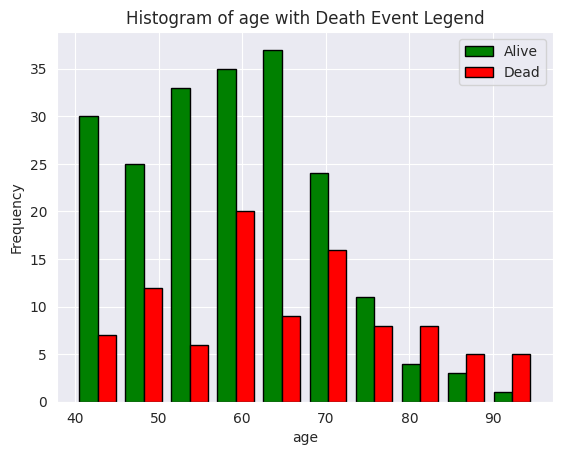

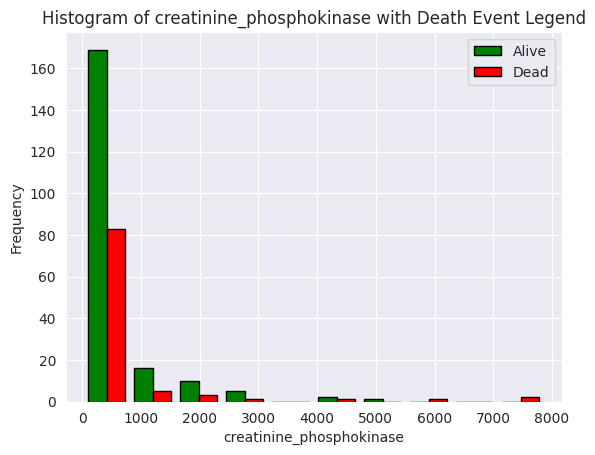

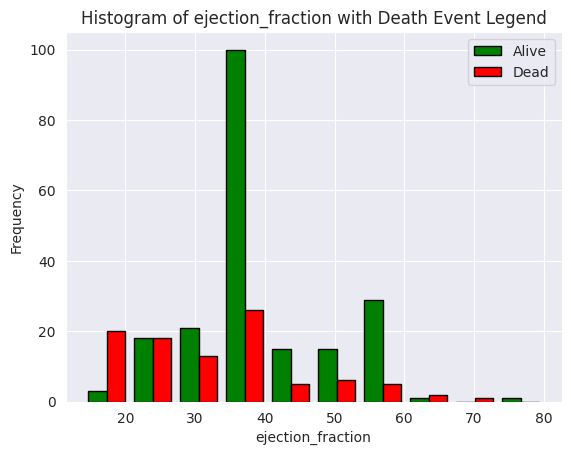

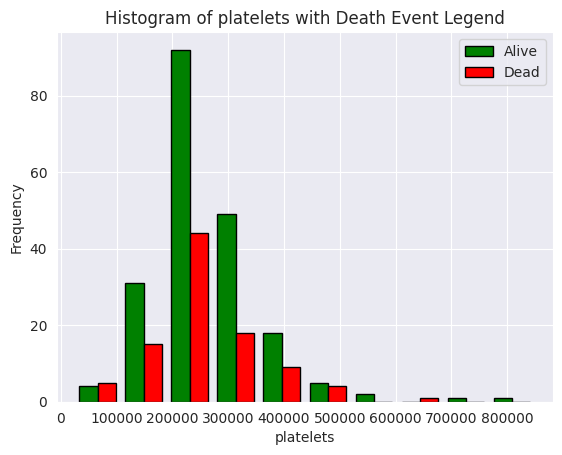

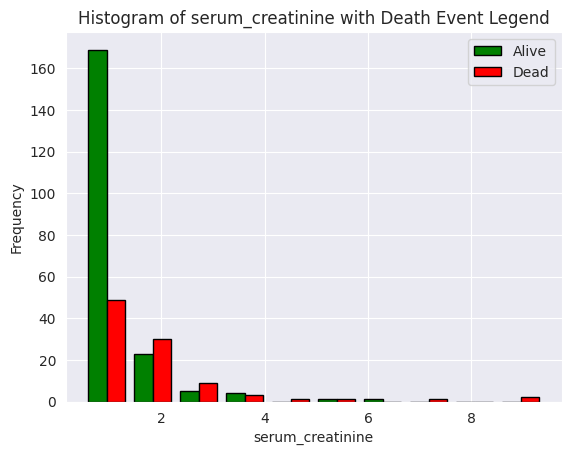

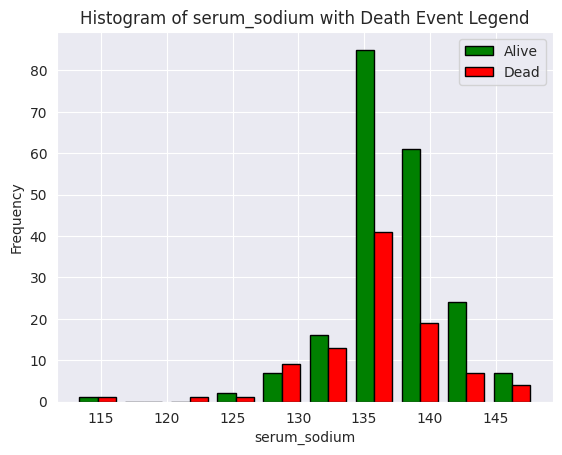

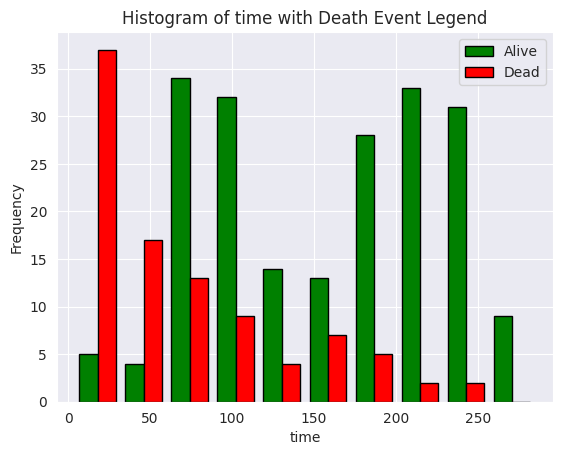

In [12]:
for i in df_cont_columns.columns:
    hist_plot(i)

In [13]:

def count_plot(col):
    # Plotting
    ax = sns.countplot(x=col, hue='DEATH_EVENT', data=df, palette={0: 'green', 1: 'red'})
    
    # Adding labels and title
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count of {col} with Death Event')
    
    # Adding legend
    plt.legend(title='Death Event', labels=['Alive', 'Dead'])
    
    # Adding count values on bars
    for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    # Displaying the plot
    plt.show()

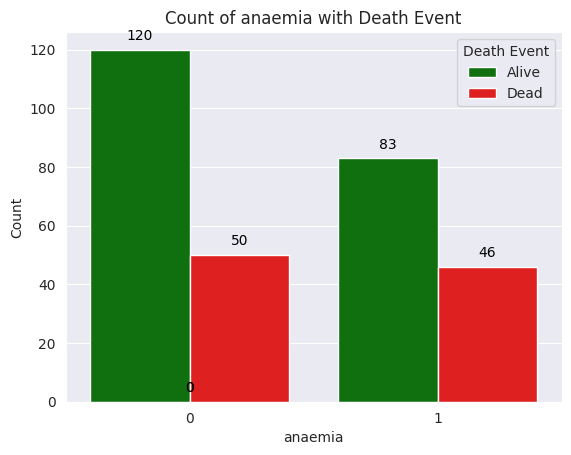

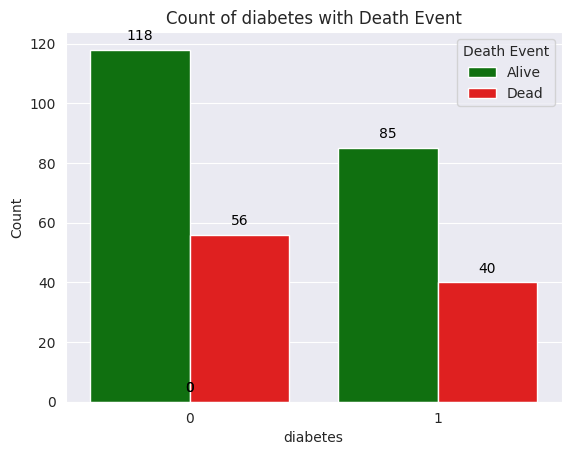

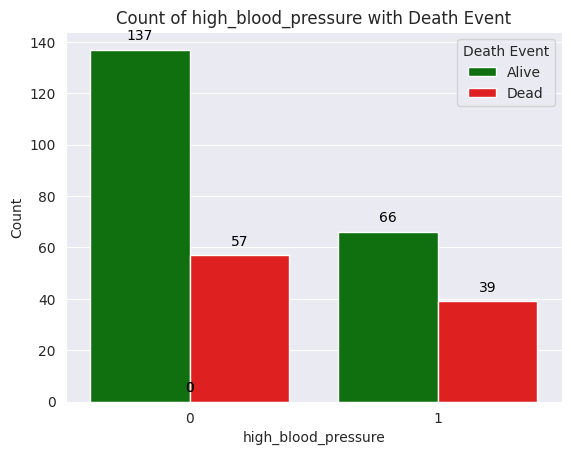

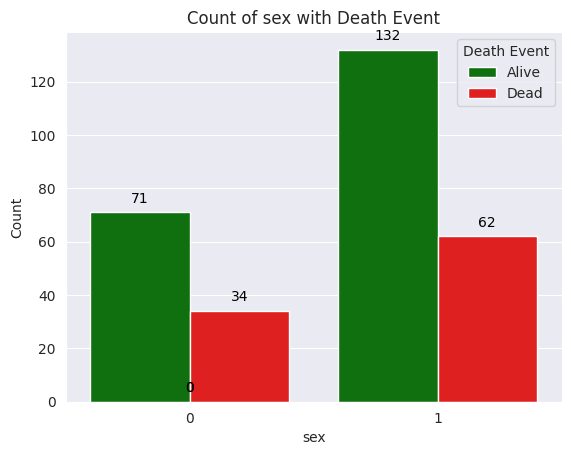

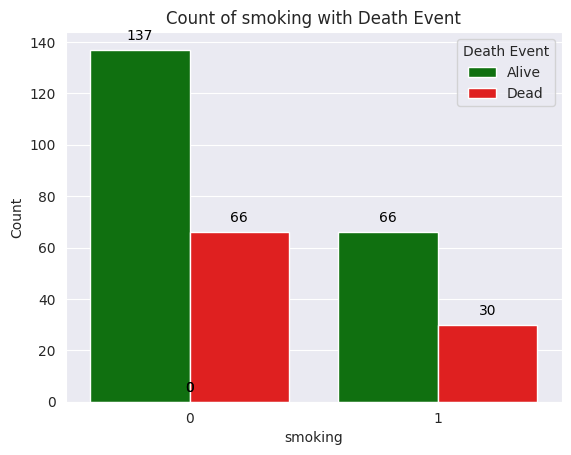

In [14]:
for i in cat_columns:
    count_plot(i)

In [15]:
def box_plot(col):

    # Plotting
    sns.boxplot(x='DEATH_EVENT', y=col, data=df)
    
    # Adding labels and title
    plt.xlabel('Death Event')
    plt.ylabel(col)
    plt.title(f'Box Plot of {col} with Death Event')

    
    # Displaying the plot
    plt.show()

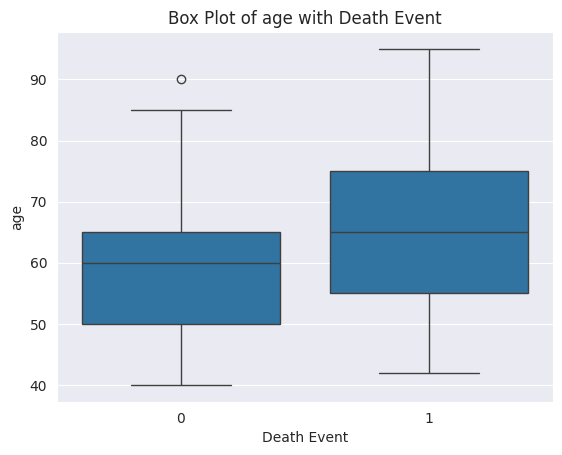

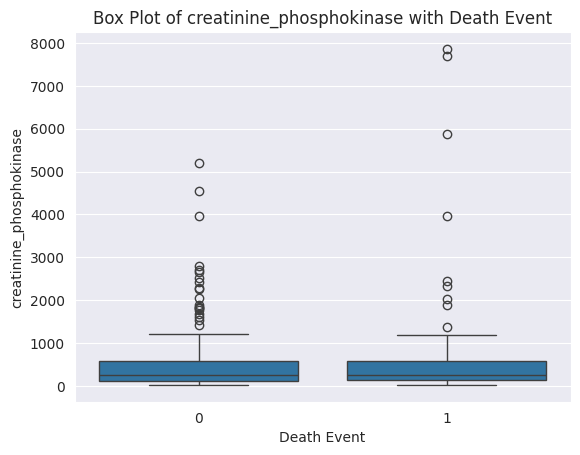

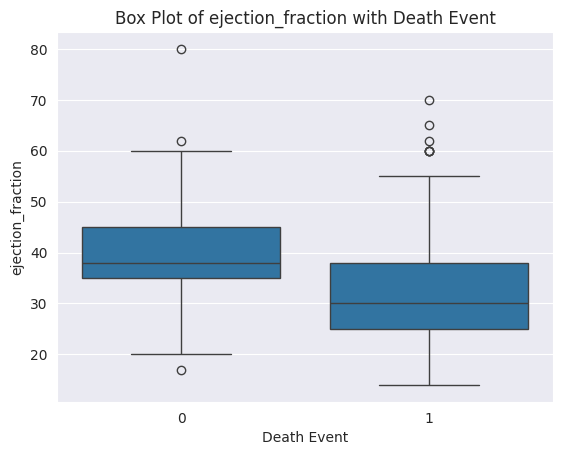

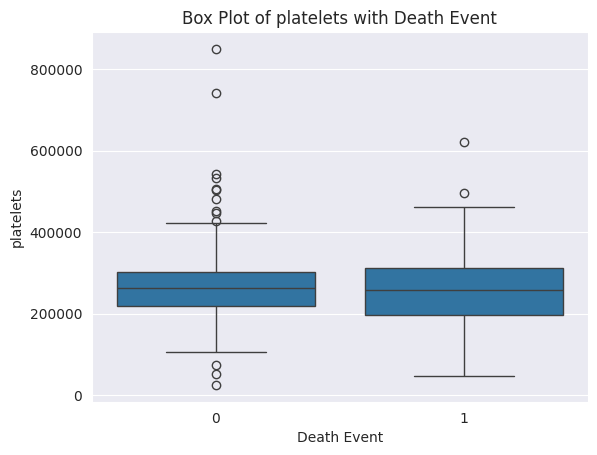

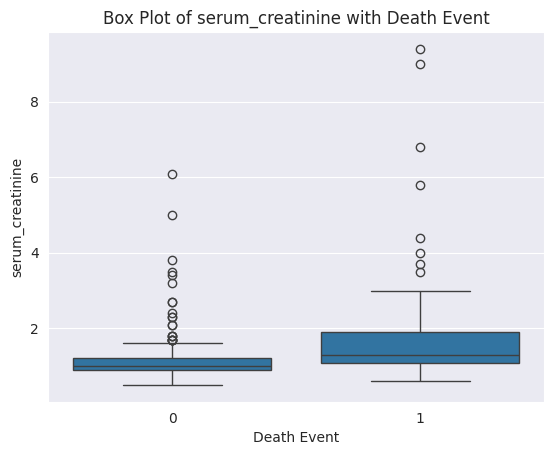

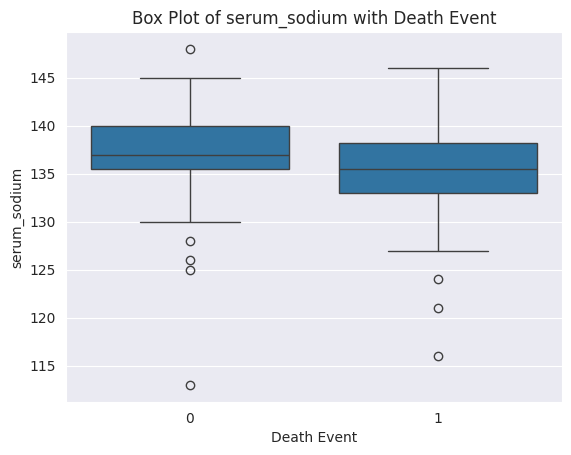

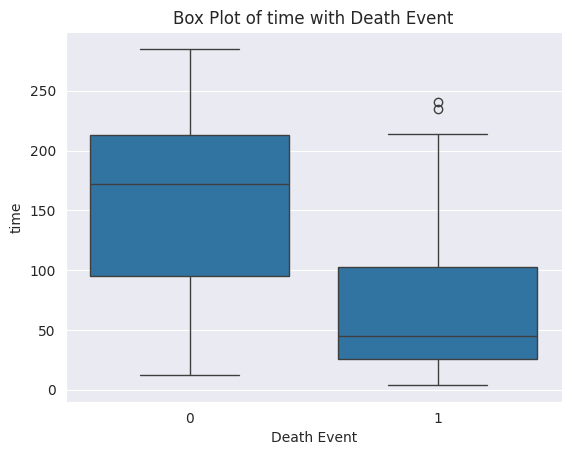

In [16]:
for i in cont_columns:
    box_plot(i)

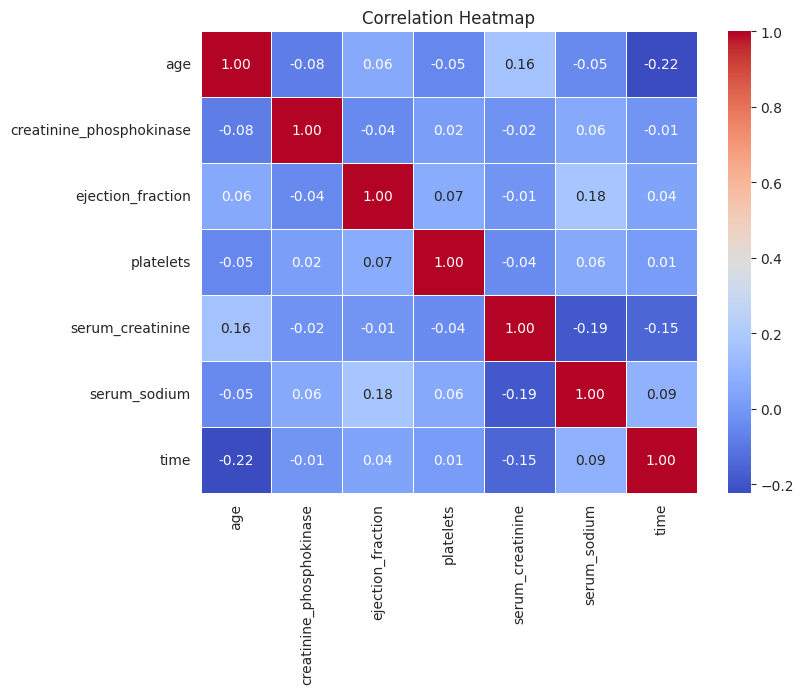

In [17]:
#heat map for correlation between continous variable
# Calculate the correlation matrix
correlation_matrix = df_cont_columns.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()



## Data cleaning & preprocessing 

#### removing outliers 

In [18]:
df.shape

(299, 13)

In [19]:
df_no_outliers = df.copy()

In [20]:
# Iterate over numerical columns
for column in df_cont_columns.columns:
    # Calculate quartiles and IQR
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

In [21]:
df_no_outliers.shape

(224, 13)

In [22]:
((df.shape[0] - df_no_outliers.shape[0])/df.shape[0]) * 100

25.08361204013378

25% of data are outliers 

### data cleaning 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### feature engineering 

In [24]:
df_feature_eng = df.copy()

In [25]:
cat_features = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_sodium','serum_creatinine','time']

In [26]:
for i in cat_features:
    df_feature_eng[i] = pd.cut(df_feature_eng[i], bins=3, labels=range(3))

df_feature_eng = pd.get_dummies(df_feature_eng, columns = cat_features, drop_first = True)


In [27]:
for i in df_feature_eng.select_dtypes(include='bool'):
    df_feature_eng[i] = df_feature_eng[i].astype('int')

In [28]:
df_feature_eng

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT,age_1,age_2,creatinine_phosphokinase_1,creatinine_phosphokinase_2,ejection_fraction_1,ejection_fraction_2,platelets_1,platelets_2,serum_sodium_1,serum_sodium_2,serum_creatinine_1,serum_creatinine_2,time_1,time_2
0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1
295,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
296,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1
297,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


#### standardization 

In [29]:
df_stand = df.copy()

In [30]:
# Columns to scale

# Applying StandardScaler to selected columns
standard_scaler = StandardScaler()
df_stand[cont_columns] = standard_scaler.fit_transform(df_stand[cont_columns])


In [31]:
df_stand

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,0.490057,-1.504036,1,0,-1.629502,1
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,-0.284552,-0.141976,1,0,-1.603691,1
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,-0.090900,-1.731046,1,1,-1.590785,1
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,0.490057,0.085034,1,0,-1.590785,1
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,1.264666,-4.682176,0,0,-1.577879,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,0,-0.537688,1,-0.007077,1,-1.109765e+00,-0.284552,1.447094,1,1,1.803451,0
295,-0.491279,0,1.278215,0,-0.007077,0,6.802472e-02,-0.187726,0.539054,0,0,1.816357,0
296,-1.333392,0,1.525979,1,1.854958,0,4.902082e+00,-0.575031,0.312044,0,0,1.906697,0
297,-1.333392,0,1.890398,0,-0.007077,0,-1.263389e+00,0.005926,0.766064,1,1,1.932509,0


## Model training 

In [68]:
# Load example datasets
datasets = {'original_dataset': df, 'no_outliers_dataset': df_no_outliers,'feat_eng_dataset':df_feature_eng,'standardized_dataset':df_stand}

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LightGBM': LGBMClassifier()
}

# columns = ['Dataset', 'Classifier', 'Accuracy', 'Recall', 'Precision', 'Training Time (s)']
# results_df = pd.DataFrame(columns=columns)

result = {}
# Iterate over datasets
for dataset_name, dataset in datasets.items():
    X = dataset.drop(['DEATH_EVENT'],axis=1)
    y = dataset[['DEATH_EVENT']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    results[dataset_name] = {}

    # Iterate over classifiers
    for clf_name, clf in classifiers.items():
        start_time = time.time()
        clf.fit(X_train, y_train)
        end_time = time.time()
        training_time = end_time - start_time
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        # roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), average='weighted', multi_class='ovr')
        results[dataset_name][clf_name] = {'A': round(accuracy,3), 'R': round(recall,3), 'P': round(precision,3),'T': round(training_time,3)}      

[LightGBM] [Info] Number of positive: 71, number of negative: 168
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 239, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.297071 -> initscore=-0.861284
[LightGBM] [Info] Start training from score -0.861284
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [69]:
pd.DataFrame(results)

,original_dataset,no_outliers_dataset,feat_eng_dataset,standardized_dataset
Logistic Regression,"{'A': 0.8, 'R': 0.8, 'P': 0.815, 'T': 0.016}","{'A': 0.867, 'R': 0.867, 'P': 0.866, 'T': 0.007}","{'A': 0.683, 'R': 0.683, 'P': 0.701, 'T': 0.003}","{'A': 0.8, 'R': 0.8, 'P': 0.83, 'T': 0.003}"
Decision Tree,"{'A': 0.667, 'R': 0.667, 'P': 0.662, 'T': 0.002}","{'A': 0.667, 'R': 0.667, 'P': 0.677, 'T': 0.002}","{'A': 0.617, 'R': 0.617, 'P': 0.606, 'T': 0.002}","{'A': 0.667, 'R': 0.667, 'P': 0.663, 'T': 0.002}"
Random Forest,"{'A': 0.7, 'R': 0.7, 'P': 0.718, 'T': 0.1}","{'A': 0.822, 'R': 0.822, 'P': 0.811, 'T': 0.075}","{'A': 0.65, 'R': 0.65, 'P': 0.648, 'T': 0.068}","{'A': 0.733, 'R': 0.733, 'P': 0.748, 'T': 0.09}"
SVM,"{'A': 0.583, 'R': 0.583, 'P': 0.34, 'T': 0.003}","{'A': 0.756, 'R': 0.756, 'P': 0.571, 'T': 0.002}","{'A': 0.7, 'R': 0.7, 'P': 0.718, 'T': 0.003}","{'A': 0.783, 'R': 0.783, 'P': 0.802, 'T': 0.002}"
XGBoost,"{'A': 0.767, 'R': 0.767, 'P': 0.77, 'T': 0.033}","{'A': 0.844, 'R': 0.844, 'P': 0.837, 'T': 0.073}","{'A': 0.667, 'R': 0.667, 'P': 0.667, 'T': 0.044}","{'A': 0.767, 'R': 0.767, 'P': 0.77, 'T': 0.034}"
Gradient Boosting,"{'A': 0.733, 'R': 0.733, 'P': 0.739, 'T': 0.082}","{'A': 0.822, 'R': 0.822, 'P': 0.811, 'T': 0.063}","{'A': 0.683, 'R': 0.683, 'P': 0.684, 'T': 0.057}","{'A': 0.733, 'R': 0.733, 'P': 0.739, 'T': 0.079}"
LightGBM,"{'A': 0.767, 'R': 0.767, 'P': 0.77, 'T': 0.053}","{'A': 0.822, 'R': 0.822, 'P': 0.811, 'T': 0.019}","{'A': 0.7, 'R': 0.7, 'P': 0.707, 'T': 0.022}","{'A': 0.75, 'R': 0.75, 'P': 0.755, 'T': 0.026}"
